In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# List of Imports
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import sympy as sp

#Creating Labels for Data (Fall vs Non Fall)
pd.options.display.float_format = '{:.1f}'.format
sns.set() 
plt.style.use('ggplot')
print('keras version ', keras.__version__)

LABELS = ['Fall',
          'Non Fall',
                               ]

TIME_PERIODS = 80
STEP_DISTANCE = 40

#Importing CSV (Specific to the Mobifall Dataset)
def read_data(file_path,User_number,Activity_class):
    User = []
    Activity = []
    
    column_names = ['ID',
                    'X',
                    'Y',
                    'Z',
                        ]  
    
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13],axis = 0)
    df = df.reset_index()
    df = df.drop(['index'],axis=1)
    
    for i in range(len(df['X'])):
        a = User_number
        User.append(User_number)
    for j in range(len(df['X'])):
        b = Activity_class
        Activity.append(Activity_class)
        
    df['Activity'] = Activity
    df['User'] = User
    
    df['User'] = df['User'].apply(convert_to_int)
    df['X'] = df['X'].apply(convert_to_float)
    df['Y'] = df['Y'].apply(convert_to_float)
    df['Z'] = df['Z'].apply(convert_to_float)
    df = df[['ID','User','Activity','X','Y','Z']]
    
   
    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

def convert_to_int(x):

    try:
        return np.int(x)
    except:
        return np.nan
    
    
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))
    
    

BSC_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_1_1.txt',1,'Backward Sitting Chair Fall')
BSC_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_2_1.txt',2,'Backward Sitting Chair Fall')
BSC_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_3_1.txt',3,'Backward Sitting Chair Fall')
BSC_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_4_1.txt',4,'Backward Sitting Chair Fall')
BSC_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_5_1.txt',5,'Backward Sitting Chair Fall')
BSC_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_6_1.txt',6,'Backward Sitting Chair Fall')
BSC_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_7_1.txt',7,'Backward Sitting Chair Fall')
BSC_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_8_1.txt',8,'Backward Sitting Chair Fall')
BSC_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_9_1.txt',9,'Backward Sitting Chair Fall')
BSC_10= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_10_1.txt',10,'Backward Sitting Chair Fall')
BSC_11= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_11_1.txt',11,'Backward Sitting Chair Fall')
BSC_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_12_1.txt',12,'Backward Sitting Chair Fall')
BSC_13= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_13_1.txt',13,'Backward Sitting Chair Fall')
BSC_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_14_1.txt',14,'Backward Sitting Chair Fall')
BSC_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_15_1.txt',15,'Backward Sitting Chair Fall')
BSC_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_16_1.txt',16,'Backward Sitting Chair Fall')
BSC_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_17_1.txt',17,'Backward Sitting Chair Fall')
BSC_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_18_1.txt',18,'Backward Sitting Chair Fall')
BSC_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_19_1.txt',19,'Backward Sitting Chair Fall')
BSC_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_20_1.txt',20,'Backward Sitting Chair Fall')
BSC_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_21_1.txt',21,'Backward Sitting Chair Fall')
BSC_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_22_1.txt',22,'Backward Sitting Chair Fall')
BSC_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_23_1.txt',23,'Backward Sitting Chair Fall')
BSC_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_24_1.txt',24,'Backward Sitting Chair Fall')
BSC_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_25_1.txt',25,'Backward Sitting Chair Fall')
BSC_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_26_1.txt',26,'Backward Sitting Chair Fall')
BSC_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_27_1.txt',27,'Backward Sitting Chair Fall')
BSC_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_28_1.txt',28,'Backward Sitting Chair Fall')
BSC_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_29_1.txt',29,'Backward Sitting Chair Fall')
BSC_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_30_1.txt',30,'Backward Sitting Chair Fall')
BSC_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_31_1.txt',31,'Backward Sitting Chair Fall')
BSC_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_32_1.txt',32,'Backward Sitting Chair Fall')
BSC_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_33_1.txt',33,'Backward Sitting Chair Fall')
BSC_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_34_1.txt',34,'Backward Sitting Chair Fall')
BSC_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_35_1.txt',35,'Backward Sitting Chair Fall')
BSC_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_36_1.txt',36,'Backward Sitting Chair Fall')
BSC_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_37_1.txt',37,'Backward Sitting Chair Fall')
BSC_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_38_1.txt',38,'Backward Sitting Chair Fall')
BSC_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_39_1.txt',39,'Backward Sitting Chair Fall')
BSC_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\BSC\BSC_acc_40_1.txt',40,'Backward Sitting Chair Fall')

FKL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_1_1.txt',1,'Forward Knees Fall')
FKL_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_2_1.txt',2,'Forward Knees Fall')
FKL_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_3_1.txt',3,'Forward Knees Fall')
FKL_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_4_1.txt',4,'Forward Knees Fall')
FKL_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_5_1.txt',5,'Forward Knees Fall')
FKL_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_6_1.txt',6,'Forward Knees Fall')
FKL_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_7_1.txt',7,'Forward Knees Fall')
FKL_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_8_1.txt',8,'Forward Knees Fall')
FKL_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_9_1.txt',9,'Forward Knees Fall')
FKL_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_10_1.txt',10,'Forward Knees Fall')
FKL_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_11_1.txt',11,'Forward Knees Fall')
FKL_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_12_1.txt',12,'Forward Knees Fall')
FKL_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_13_1.txt',13,'Forward Knees Fall')
FKL_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_14_1.txt',14,'Forward Knees Fall')
FKL_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_15_1.txt',15,'Forward Knees Fall')
FKL_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_16_1.txt',16,'Forward Knees Fall')
FKL_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_17_1.txt',17,'Forward Knees Fall')
FKL_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_18_1.txt',18,'Forward Knees Fall')
FKL_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_19_1.txt',19,'Forward Knees Fall')
FKL_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_20_1.txt',20,'Forward Knees Fall')
FKL_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_21_1.txt',21,'Forward Knees Fall')
FKL_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_22_1.txt',22,'Forward Knees Fall')
FKL_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_23_1.txt',23,'Forward Knees Fall')
FKL_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_24_1.txt',24,'Forward Knees Fall')
FKL_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_25_1.txt',25,'Forward Knees Fall')
FKL_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_26_1.txt',26,'Forward Knees Fall')
FKL_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_27_1.txt',27,'Forward Knees Fall')
FKL_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_28_1.txt',28,'Forward Knees Fall')
FKL_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_29_1.txt',29,'Forward Knees Fall')
FKL_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_30_1.txt',30,'Forward Knees Fall')
FKL_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_31_1.txt',31,'Forward Knees Fall')
FKL_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_32_1.txt',32,'Forward Knees Fall')
FKL_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_33_1.txt',33,'Forward Knees Fall')
FKL_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_34_1.txt',34,'Forward Knees Fall')
FKL_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_35_1.txt',35,'Forward Knees Fall')
FKL_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_36_1.txt',36,'Forward Knees Fall')
FKL_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_37_1.txt',37,'Forward Knees Fall')
FKL_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_38_1.txt',38,'Forward Knees Fall')
FKL_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_39_1.txt',39,'Forward Knees Fall')
FKL_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FKL\FKL_acc_40_1.txt',40,'Forward Knees Fall')

FOL_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_1_1.txt',1,'Forward Lying Fall')
FOL_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_2_1.txt',2,'Forward Lying Fall')
FOL_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_3_1.txt',3,'Forward Lying Fall')
FOL_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_4_1.txt',4,'Forward Lying Fall')
FOL_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_5_1.txt',5,'Forward Lying Fall')
FOL_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_6_1.txt',6,'Forward Lying Fall')
FOL_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_7_1.txt',7,'Forward Lying Fall')
FOL_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_8_1.txt',8,'Forward Lying Fall')
FOL_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_9_1.txt',9,'Forward Lying Fall')
FOL_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_10_1.txt',10,'Forward Lying Fall')
FOL_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_11_1.txt',11,'Forward Lying Fall')
FOL_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_12_1.txt',12,'Forward Lying Fall')
FOL_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_13_1.txt',13,'Forward Lying Fall')
FOL_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_14_1.txt',14,'Forward Lying Fall')
FOL_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_15_1.txt',15,'Forward Lying Fall')
FOL_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_16_1.txt',16,'Forward Lying Fall')
FOL_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_17_1.txt',17,'Forward Lying Fall')
FOL_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_18_1.txt',18,'Forward Lying Fall')
FOL_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_19_1.txt',19,'Forward Lying Fall')
FOL_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_20_1.txt',20,'Forward Lying Fall')
FOL_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_21_1.txt',21,'Forward Lying Fall')
FOL_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_22_1.txt',22,'Forward Lying Fall')
FOL_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_23_1.txt',23,'Forward Lying Fall')
FOL_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_24_1.txt',24,'Forward Lying Fall')
FOL_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_25_1.txt',25,'Forward Lying Fall')
FOL_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_26_1.txt',26,'Forward Lying Fall')
FOL_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_27_1.txt',27,'Forward Lying Fall')
FOL_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_28_1.txt',28,'Forward Lying Fall')
FOL_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_29_1.txt',29,'Forward Lying Fall')
FOL_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_20_1.txt',30,'Forward Lying Fall')
FOL_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_31_1.txt',31,'Forward Lying Fall')
FOL_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_32_1.txt',32,'Forward Lying Fall')
FOL_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_33_1.txt',33,'Forward Lying Fall')
FOL_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_34_1.txt',34,'Forward Lying Fall')
FOL_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_35_1.txt',35,'Forward Lying Fall')
FOL_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_36_1.txt',36,'Forward Lying Fall')
FOL_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_37_1.txt',37,'Forward Lying Fall')
FOL_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_38_1.txt',38,'Forward Lying Fall')
FOL_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_39_1.txt',39,'Forward Lying Fall')
FOL_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\FOL\FOL_acc_40_1.txt',40,'Forward Lying Fall')

JOG_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_1_1.txt',1,'Jogging')
JOG_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_2_1.txt',2,'Jogging')
JOG_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_3_1.txt',3,'Jogging')
JOG_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_4_1.txt',4,'Jogging')
JOG_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_5_1.txt',5,'Jogging')
JOG_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_6_1.txt',6,'Jogging')
JOG_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_7_1.txt',7,'Jogging')
JOG_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_8_1.txt',8,'Jogging')
JOG_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_9_1.txt',9,'Jogging')
JOG_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_10_1.txt',10,'Jogging')
JOG_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_11_1.txt',11,'Jogging')
JOG_12 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_12_1.txt',12,'Jogging')
JOG_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_13_1.txt',13,'Jogging')
JOG_14 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_14_1.txt',14,'Jogging')
JOG_15 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_15_1.txt',15,'Jogging')
JOG_16 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_16_1.txt',16,'Jogging')
JOG_17 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_17_1.txt',17,'Jogging')
JOG_18 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_18_1.txt',18,'Jogging')
JOG_19 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_19_1.txt',19,'Jogging')
JOG_20 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_20_1.txt',20,'Jogging')
JOG_21 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_21_1.txt',21,'Jogging')
JOG_22 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_22_1.txt',22,'Jogging')
JOG_23 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_23_1.txt',23,'Jogging')
JOG_24 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_24_1.txt',24,'Jogging')
JOG_25 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_25_1.txt',25,'Jogging')
JOG_26 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_26_1.txt',26,'Jogging')
JOG_27 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_27_1.txt',27,'Jogging')
JOG_28 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_28_1.txt',28,'Jogging')
JOG_29 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_29_1.txt',29,'Jogging')
JOG_30 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_30_1.txt',30,'Jogging')
JOG_31 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_31_1.txt',31,'Jogging')
JOG_32 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_32_1.txt',32,'Jogging')
JOG_33 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_33_1.txt',33,'Jogging')
JOG_34 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_34_1.txt',34,'Jogging')
JOG_35 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_35_1.txt',35,'Jogging')
JOG_36 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_36_1.txt',36,'Jogging')
JOG_37 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_37_1.txt',37,'Jogging')
JOG_38 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_38_1.txt',38,'Jogging')
JOG_39 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_39_1.txt',39,'Jogging')
JOG_40 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JOG\JOG_acc_40_1.txt',40,'Jogging')

JUM_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_1_1.txt',1,'Jumping')
JUM_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_2_1.txt',2,'Jumping')
JUM_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_3_1.txt',3,'Jumping')
JUM_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_4_1.txt',4,'Jumping')
JUM_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_5_1.txt',5,'Jumping')
JUM_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_6_1.txt',6,'Jumping')
JUM_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_7_1.txt',7,'Jumping')
JUM_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_8_1.txt',8,'Jumping')
JUM_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_9_1.txt',9,'Jumping')
JUM_10 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_10_1.txt',10,'Jumping')
JUM_11 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_11_1.txt',11,'Jumping')
JUM_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_12_1.txt',12,'Jumping')
JUM_13 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_13_1.txt',13,'Jumping')
JUM_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_14_1.txt',14,'Jumping')
JUM_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_15_1.txt',15,'Jumping')
JUM_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_16_1.txt',16,'Jumping')
JUM_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_17_1.txt',17,'Jumping')
JUM_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_18_1.txt',18,'Jumping')
JUM_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_19_1.txt',19,'Jumping')
JUM_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_20_1.txt',20,'Jumping')
JUM_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_21_1.txt',21,'Jumping')
JUM_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_22_1.txt',22,'Jumping')
JUM_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_23_1.txt',23,'Jumping')
JUM_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_24_1.txt',24,'Jumping')
JUM_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_25_1.txt',25,'Jumping')
JUM_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_26_1.txt',26,'Jumping')
JUM_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_27_1.txt',27,'Jumping')
JUM_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_28_1.txt',28,'Jumping')
JUM_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_29_1.txt',29,'Jumping')
JUM_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_30_1.txt',30,'Jumping')
JUM_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_31_1.txt',31,'Jumping')
JUM_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_32_1.txt',32,'Jumping')
JUM_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_33_1.txt',33,'Jumping')
JUM_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_34_1.txt',34,'Jumping')
JUM_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_35_1.txt',35,'Jumping')
JUM_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_36_1.txt',36,'Jumping')
JUM_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_37_1.txt',37,'Jumping')
JUM_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_38_1.txt',38,'Jumping')
JUM_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_39_1.txt',39,'Jumping')
JUM_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\JUM\JUM_acc_40_1.txt',40,'Jumping')

STD_1 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_1_1.txt',1,'Standing')
STD_2 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_2_1.txt',2,'Standing')
STD_3 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_3_1.txt',3,'Standing')
STD_4 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_4_1.txt',4,'Standing')
STD_5 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_5_1.txt',5,'Standing')
STD_6 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_6_1.txt',6,'Standing')
STD_7 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_7_1.txt',7,'Standing')
STD_8 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_8_1.txt',8,'Standing')
STD_9 = read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_9_1.txt',9,'Standing')
STD_10= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_10_1.txt',10,'Standing')
STD_11= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_11_1.txt',11,'Standing')
STD_12= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_12_1.txt',12,'Standing')
STD_13= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_13_1.txt',13,'Standing')
STD_14= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_14_1.txt',14,'Standing')
STD_15= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_15_1.txt',15,'Standing')
STD_16= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_16_1.txt',16,'Standing')
STD_17= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_17_1.txt',17,'Standing')
STD_18= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_18_1.txt',18,'Standing')
STD_19= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_19_1.txt',19,'Standing')
STD_20= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_20_1.txt',20,'Standing')
STD_21= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_21_1.txt',21,'Standing')
STD_22= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_22_1.txt',22,'Standing')
STD_23= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_23_1.txt',23,'Standing')
STD_24= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_24_1.txt',24,'Standing')
STD_25= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_25_1.txt',25,'Standing')
STD_26= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_26_1.txt',26,'Standing')
STD_27= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_27_1.txt',27,'Standing')
STD_28= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_28_1.txt',28,'Standing')
STD_29= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_29_1.txt',29,'Standing')
STD_30= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_30_1.txt',30,'Standing')
STD_31= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_31_1.txt',31,'Standing')
STD_32= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_32_1.txt',32,'Standing')
STD_33= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_33_1.txt',33,'Standing')
STD_34= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_34_1.txt',34,'Standing')
STD_35= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_35_1.txt',35,'Standing')
STD_36= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_36_1.txt',36,'Standing')
STD_37= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_37_1.txt',37,'Standing')
STD_38= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_38_1.txt',38,'Standing')
STD_39= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_39_1.txt',39,'Standing')
STD_40= read_data(r'C:\Users\Ash\Desktop\MobiAct_Dataset\\Network\STD\STD_acc_40_1.txt',40,'Standing')

# Deleting Activities Class from data set and reconstructing activities as FALL
Fall = [BSC_1,BSC_2,BSC_3,BSC_4,BSC_5,BSC_6,BSC_7,BSC_8,BSC_9,BSC_10,BSC_11,BSC_12,BSC_13,BSC_14,BSC_15,BSC_16,BSC_17,BSC_18,BSC_19,BSC_20,BSC_21,BSC_22,BSC_23,BSC_24,BSC_25,BSC_26,BSC_27,BSC_28,BSC_29,BSC_30,BSC_31,BSC_32,BSC_33,BSC_34,BSC_35,BSC_36,BSC_37,BSC_38,BSC_39,BSC_40,
        FKL_1,FKL_2,FKL_3,FKL_4,FKL_5,FKL_6,FKL_7,FKL_8,FKL_9,FKL_10,FKL_11,FKL_12,FKL_13,FKL_14,FKL_15,FKL_16,FKL_17,FKL_18,FKL_19,FKL_20,FKL_21,FKL_22,FKL_23,FKL_24,FKL_25,FKL_26,FKL_27,FKL_28,FKL_29,FKL_30,FKL_31,FKL_32,FKL_33,FKL_34,FKL_35,FKL_36,FKL_37,FKL_38,FKL_39,FKL_40,
        FOL_1,FOL_2,FOL_3,FOL_4,FOL_5,FOL_6,FOL_7,FOL_8,FOL_9,FOL_10,FOL_11,FOL_12,FOL_13,FOL_14,FOL_15,FOL_16,FOL_17,FOL_18,FOL_19,FOL_20,FOL_21,FOL_22,FOL_23,FOL_24,FOL_25,FOL_26,FOL_27,FOL_28,FOL_29,FOL_30,FOL_31,FOL_32,FOL_33,FOL_34,FOL_35,FOL_36,FOL_37,FOL_38,FOL_39,FOL_40]
storage = []
for i in range(len((pd.concat(Fall)).drop(['Activity'],axis=1)['X'])):
    a = 'Fall'
    storage.append(a)
Fall_DataFrame = (pd.concat(Fall)).drop(['Activity'],axis=1)
Fall_DataFrame['Activity'] = storage
Fall_DataFrame = Fall_DataFrame[['ID','User','Activity','X','Y','Z']]
Fall_DataFrame.head()


# Deleting Activities Class from data set and reconstructing activities as NON FALL
Non_Fall = [JOG_1,JOG_2,JOG_3,JOG_4,JOG_5,JOG_6,JOG_7,JOG_8,JOG_9,JOG_10,JOG_11,JOG_12,JOG_13,JOG_14,JOG_15,JOG_16,JOG_17,JOG_18,JOG_19,JOG_20,JOG_21,JOG_22,JOG_23,JOG_24,JOG_25,JOG_26,JOG_27,JOG_28,JOG_29,JOG_30,JOG_31,JOG_32,JOG_33,JOG_34,JOG_35,JOG_36,JOG_37,JOG_38,JOG_39,JOG_40,
            JUM_1,JUM_2,JUM_3,JUM_4,JUM_5,JUM_6,JUM_7,JUM_8,JUM_9,JUM_10,JUM_11,JUM_12,JUM_13,JUM_14,JUM_15,JUM_16,JUM_17,JUM_18,JUM_19,JUM_20,JUM_21,JUM_22,JUM_23,JUM_24,JUM_25,JUM_26,JUM_27,JUM_28,JUM_29,JUM_30,JUM_31,JUM_32,JUM_33,JUM_34,JUM_35,JUM_36,JUM_37,JUM_38,JUM_39,JUM_40,
            STD_1,STD_2,STD_3,STD_4,STD_5,STD_6,STD_7,STD_8,STD_9,STD_10,STD_11,STD_12,STD_13,STD_14,STD_15,STD_16,STD_17,STD_18,STD_19,STD_20,STD_21,STD_22,STD_23,STD_24,STD_25,STD_26,STD_27,STD_28,STD_29,STD_30,STD_31,STD_32,STD_33,STD_34,STD_35,STD_36,STD_37,STD_38,STD_39,STD_40]

storage1 = []
for i in range(len((pd.concat(Non_Fall)).drop(['Activity'],axis=1)['X'])):
    a = 'Non Fall'
    storage1.append(a)
Non_Fall_DataFrame = (pd.concat(Non_Fall)).drop(['Activity'],axis=1)
Non_Fall_DataFrame['Activity'] = storage1
Non_Fall_DataFrame = Non_Fall_DataFrame[['ID','User','Activity','X','Y','Z']]
Non_Fall_DataFrame.head()

# Concatenating the FALL and NON FALL into one DATAFRAME
df = pd.concat([Fall_DataFrame,Non_Fall_DataFrame])

Using TensorFlow backend.


keras version  2.2.4


In [3]:
# Data Preprocessing Training Set and Testing Set
#This Code adds an extra column to the dataframe called ActivityEncoded which coverts all fall labels to '0' and non falls to '1'
LABEL = 'ActivityEncoded'
le = preprocessing.LabelEncoder()
df[LABEL] = le.fit_transform(df['Activity'].values.ravel())

#This code splits what users will be used for training and testing 
df_test = df[df['User'] > 36]
df_train = df[df['User'] <= 36]

y_train = df_train[['ActivityEncoded']]
x_train = df_train[['X','Y','Z']]
y_test = df_test[['ActivityEncoded']]
x_test = df_test[['X','Y','Z']]

In [4]:
df.head()

,ID,User,Activity,X,Y,Z,ActivityEncoded
0,2318482693000,1,Fall,0.9,-9.6,-0.0,0
1,2318492108000,1,Fall,0.9,-9.6,-0.1,0
2,2318503365000,1,Fall,0.9,-9.6,-0.1,0
3,2318512831000,1,Fall,0.9,-9.6,-0.0,0
4,2318523222000,1,Fall,0.9,-9.6,-0.1,0


In [5]:
# Normalising data with mean 0 and standard deviation 1
x_train = np.array(StandardScaler().fit_transform(x_train))
x_test = np.array(StandardScaler().fit_transform(x_test))
x_train
x_train.shape


(1088829, 3)

In [6]:
#Reconstructing DataFrames
x_train = pd.DataFrame(x_train)
x_train.columns =  ['X', 'Y','Z']

x_test = pd.DataFrame(x_test)
x_test.columns =  ['X', 'Y','Z']

In [7]:
pca = PCA(n_components=2)
pca_transform_train = pca.fit_transform(x_train)
pca_transform_test = pca.fit_transform(x_test)

In [8]:
principal_Df_train = pd.DataFrame(data = pca_transform_train
             , columns = ['principal component 1', 'principal component 2'])
principal_Df_test = pd.DataFrame(data = pca_transform_test
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
p_1 = np.reshape(np.array(principal_Df_test['principal component 1']),(115227,1))
p_2 = np.reshape(np.array(principal_Df_test['principal component 2']),(115227,1))
y_1 = np.reshape(np.array(y_test['ActivityEncoded']),(115227,1))

r11 = pd.DataFrame(y_1,columns=['ActivityEncoded'])
r22 = pd.DataFrame(p_1,columns=['Principal Component 1'])
r33 = pd.DataFrame(p_2,columns=['Principal Component 2'])

finalDf = pd.concat([r11,r22,r33],axis=1)

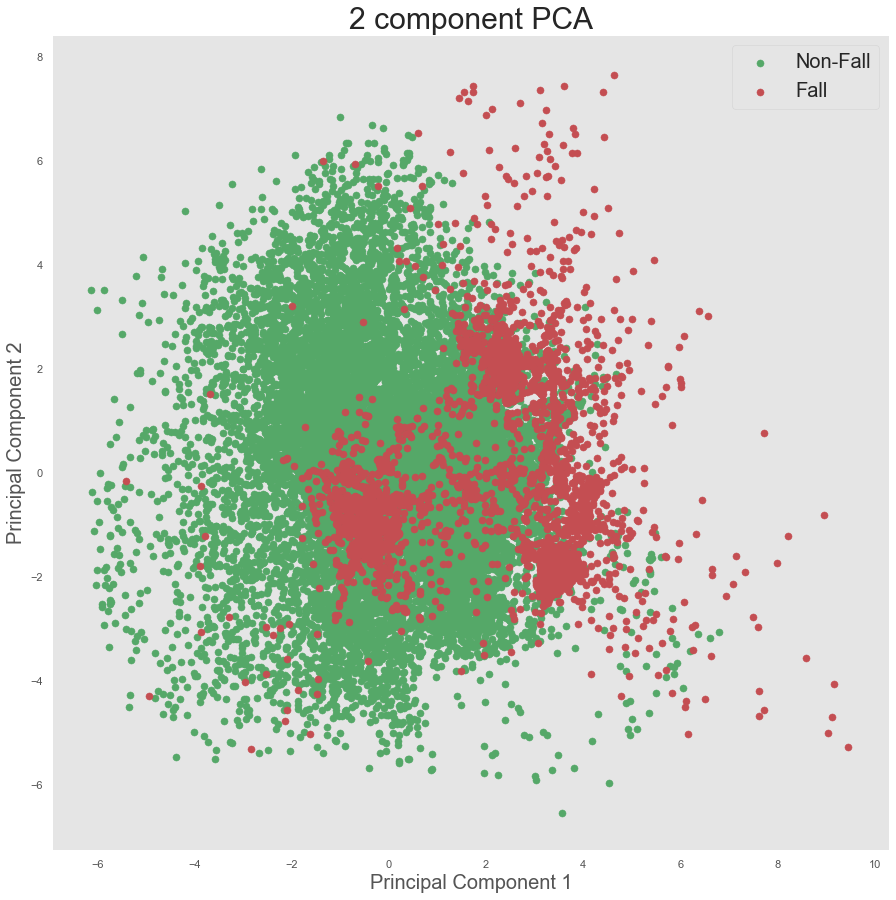

In [16]:
import pandas as pd



fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 component PCA', fontsize = 30)
targets = [1,0]
colors = ['g','r']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ActivityEncoded'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(labels=['Non-Fall','Fall'],fontsize=20)
ax.grid()    

In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
batch_size = 128
num_classes = 10
epochs = 20

In [13]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              102400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
history = model.fit(principal_Df_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(principal_Df_test, y_test))

ValueError: Error when checking input: expected dense_1_input to have shape (99,) but got array with shape (2,)